In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [9]:
data_244 = pd.read_csv('./Data/NA244.csv')
data_244.set_index('PSNO_NA_ECP', inplace=True)
data_244 = data_244.sort_index()
yellow = '#FFC300'
blue = '#00b0be' 
pink = '#f45f74' 
orange = '#FF5F1F'
light_blue = '#8fd7d7'
light_pink = '#ff8ca1'

## **Graph 1**
Number of Polling Stations won by each candidate in General Elections 2024 in NA-244 (Based on ECP Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_82557/1695366600.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


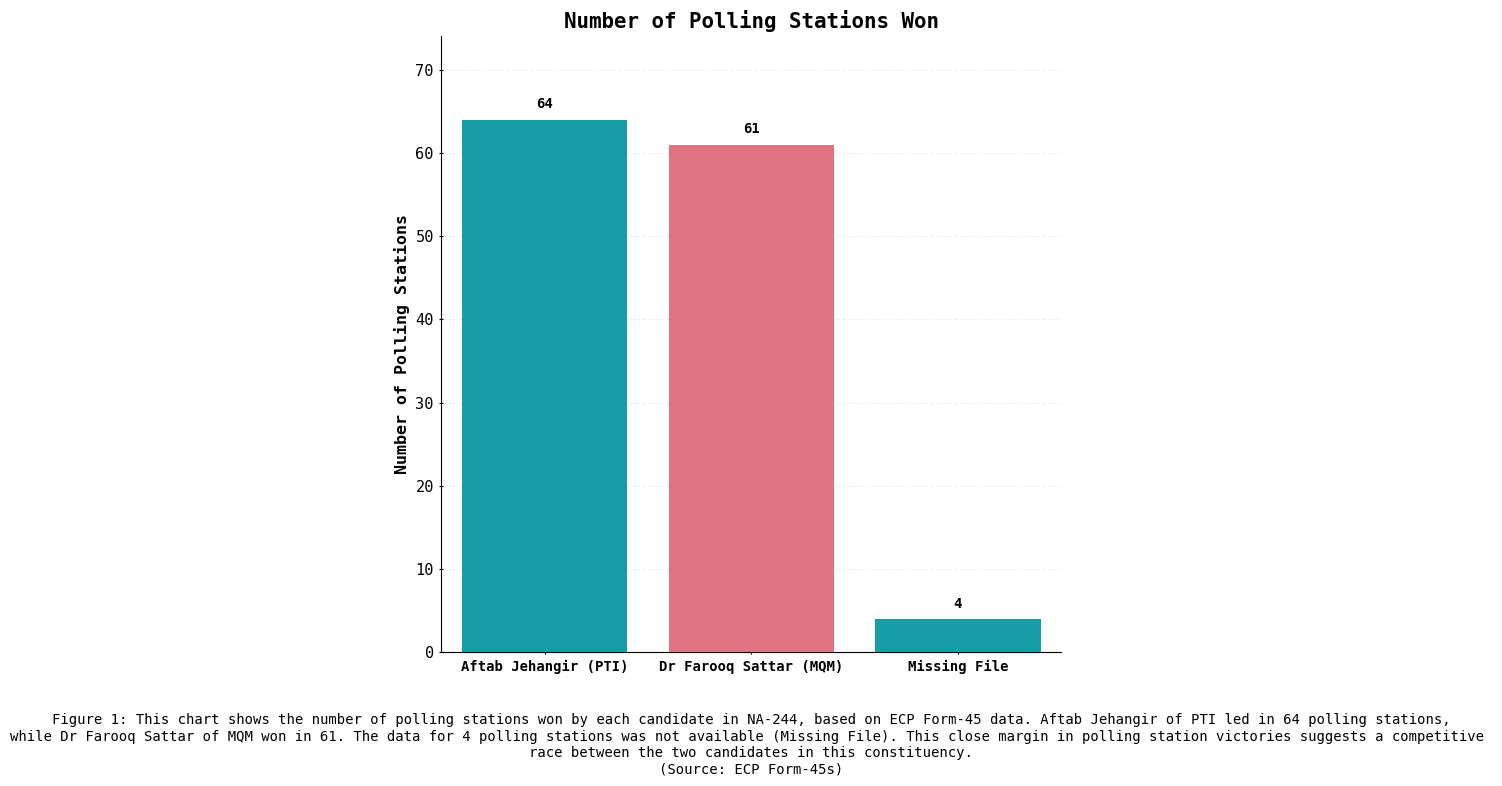

In [10]:
font_family = 'monospace'
sns.set_style({
    'axes.facecolor': 'none',
    'grid.color': 'lightgrey',
    'axes.edgecolor': 'black',
    'xtick.direction': 'inout',
    'ytick.direction': 'inout',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.bottom': True,
    'ytick.left': True,
    'font.family': font_family,
    'font.size': 12
})

data_244_ECP_Winner = data_244['WINNER_ECP'].fillna('Missing File').value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_244_ECP_Winner))]

plt.figure(figsize=(8, 8))
ax = plt.gca()

bars = sns.barplot(
    x=data_244_ECP_Winner.index,
    y=data_244_ECP_Winner.values,
    hue=data_244_ECP_Winner.index,
    legend=False,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_244_ECP_Winner.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold', ha='center')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.text(
    0.5, -0.15,
    'Figure 1: This chart shows the number of polling stations won by each candidate in NA-244, based on ECP Form-45 data. Aftab Jehangir of PTI led in 64 polling stations,\n' 
    'while Dr Farooq Sattar of MQM won in 61. The data for 4 polling stations was not available (Missing File). This close margin in polling station victories suggests a competitive \n'
    'race between the two candidates in this constituency.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=plt.gca().transAxes
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_1.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 2**
Number of Votes received by each candidate in General Elections 2024 in NA-244 (Based on ECP Form-45s)


/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_82557/4039264335.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


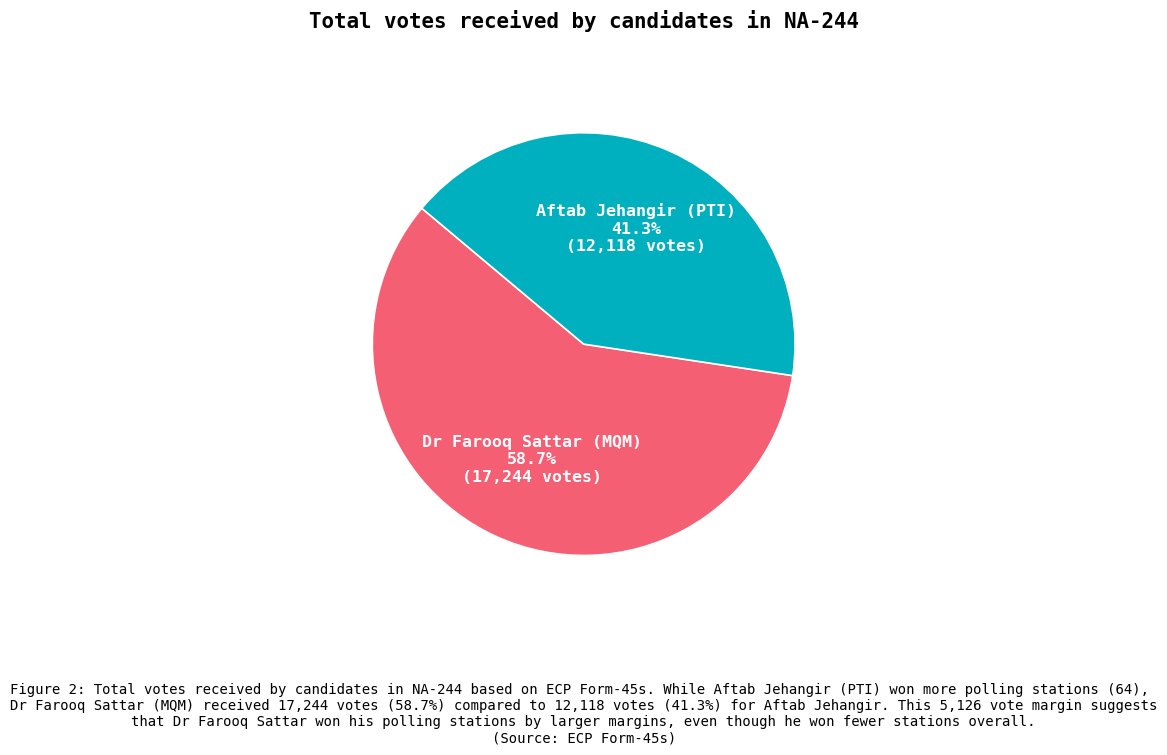

In [11]:
# Convert vote columns to numeric, coercing errors to NaN
data_244['OPP_VOTES_ECP'] = pd.to_numeric(data_244['OPP_VOTES_ECP'], errors='coerce')
data_244['PTI_VOTES_ECP'] = pd.to_numeric(data_244['PTI_VOTES_ECP'], errors='coerce')

# Filter out rows with missing values in the vote columns
data_244_votes = data_244[~data_244[['OPP_VOTES_ECP', 'PTI_VOTES_ECP']].isna().any(axis=1)]

# Filter out rows where "missing" appears in any relevant column
data_244_votes = data_244_votes[~data_244_votes.astype(str).apply(lambda x: x.str.lower().str.contains('missing')).any(axis=1)]

# Create the votes dataframe
data_244_votes_ecp = pd.DataFrame({
    'Dr Farooq Sattar (MQM)': data_244_votes['OPP_VOTES_ECP'].sum(),
    'Aftab Jehangir (PTI)': data_244_votes['PTI_VOTES_ECP'].sum()
}, index=[0]).T.squeeze()
data_244_votes_ecp.index = ['Dr Farooq Sattar (MQM)', 'Aftab Jehangir (PTI)']
candidate_colors = {
    'Dr Farooq Sattar (MQM)': pink,
    'Aftab Jehangir (PTI)': blue
}
colors = [candidate_colors[name] for name in data_244_votes_ecp.index]
labels = data_244_votes_ecp.index
values = data_244_votes_ecp.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-244', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 2: Total votes received by candidates in NA-244 based on ECP Form-45s. While Aftab Jehangir (PTI) won more polling stations (64), \n'
    'Dr Farooq Sattar (MQM) received 17,244 votes (58.7%) compared to 12,118 votes (41.3%) for Aftab Jehangir. This 5,126 vote margin suggests\n'
    'that Dr Farooq Sattar won his polling stations by larger margins, even though he won fewer stations overall.\n(Source: ECP Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_2.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 3**
Distribution of Turnout percentages in General Elections 2024 in NA-244 (Based on ECP Form-45s) NA

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_82557/2842389365.py:20: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_82557/2842389365.py:20: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.05`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


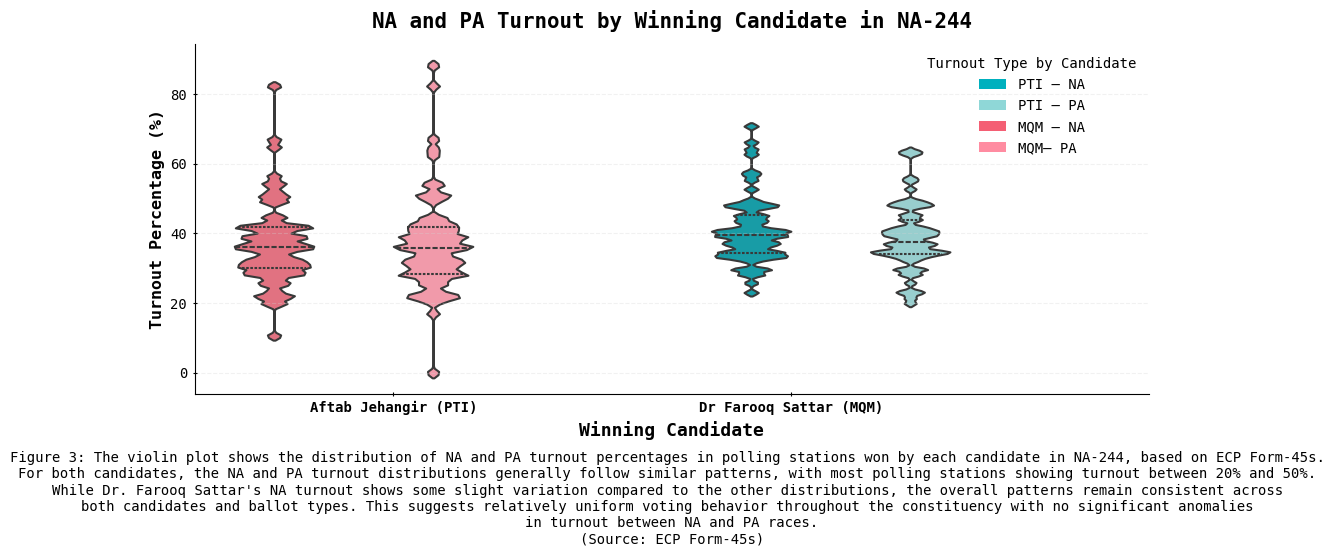

In [12]:
df_long = data_244[['WINNER_ECP', 'TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP']].copy().dropna()
df_long = df_long.melt(
    id_vars='WINNER_ECP',
    value_vars=['TURNOUT_NA_PERCENTAGE_ECP', 'TURNOUT_PA_PERCENTAGE_ECP'],
    var_name='Turnout Type',
    value_name='Turnout Percentage'
    )
df_long['Turnout Type'] = df_long['Turnout Type'].str.replace('TURNOUT_', '').str.replace('_PERCENTAGE_ECP', '')
df_long['Turnout Percentage'] = df_long['Turnout Percentage'].astype(float)

# Define colors for the violin plot
palette = {
    ('Dr Farooq Sattar (MQM)', 'NA'): blue,
    ('Dr Farooq Sattar (MQM)', 'PA'): light_blue,
    ('Aftab Jehangir (PTI)', 'NA'): pink,
    ('Aftab Jehangir (PTI)', 'PA'): light_pink
}
df_long['Hue Group'] = list(zip(df_long['WINNER_ECP'], df_long['Turnout Type']))
plt.figure(figsize=(13, 6))
ax = sns.violinplot(
    x='WINNER_ECP',
    y='Turnout Percentage',
    hue='Hue Group',
    data=df_long,
    palette=palette,
    inner='quartile',
    linewidth=1.5,
    scale='width',
    bw=0.05,
    dodge=True
)

plt.xlabel('Winning Candidate', fontsize=13, fontweight='bold')
plt.ylabel('Turnout Percentage (%)', fontsize=12, fontweight='bold')
plt.title('NA and PA Turnout by Winning Candidate in NA-244', fontsize=15, fontweight='bold', pad=12)
plt.xticks(fontsize=10, fontweight='semibold')
plt.yticks(fontsize=10)
plt.xlim(-0.5, 1.9)
ax.grid(axis='y', linestyle='--', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=blue, label='PTI – NA'),
    Patch(facecolor=light_blue, label='PTI – PA'),
    Patch(facecolor=pink, label='MQM – NA'),
    Patch(facecolor=light_pink, label='MQM– PA')
]
ax.legend(handles=legend_elements, title='Turnout Type by Candidate', loc='upper right', frameon=False)

plt.text(
    0.5, -0.3,
    'Figure 3: The violin plot shows the distribution of NA and PA turnout percentages in polling stations won by each candidate in NA-244, based on ECP Form-45s. \n'
    'For both candidates, the NA and PA turnout distributions generally follow similar patterns, with most polling stations showing turnout between 20% and 50%. \n'
    'While Dr. Farooq Sattar\'s NA turnout shows some slight variation compared to the other distributions, the overall patterns remain consistent across \n'
    'both candidates and ballot types. This suggests relatively uniform voting behavior throughout the constituency with no significant anomalies \n'
    'in turnout between NA and PA races.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    wrap=False,
    transform=ax.transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_3.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 4**
Number of polling stations won by each candidate in General Elections 2024 in NA-244 (Based on ECP Form-45s) where turnout difference between NA and PA was more than 25 votes

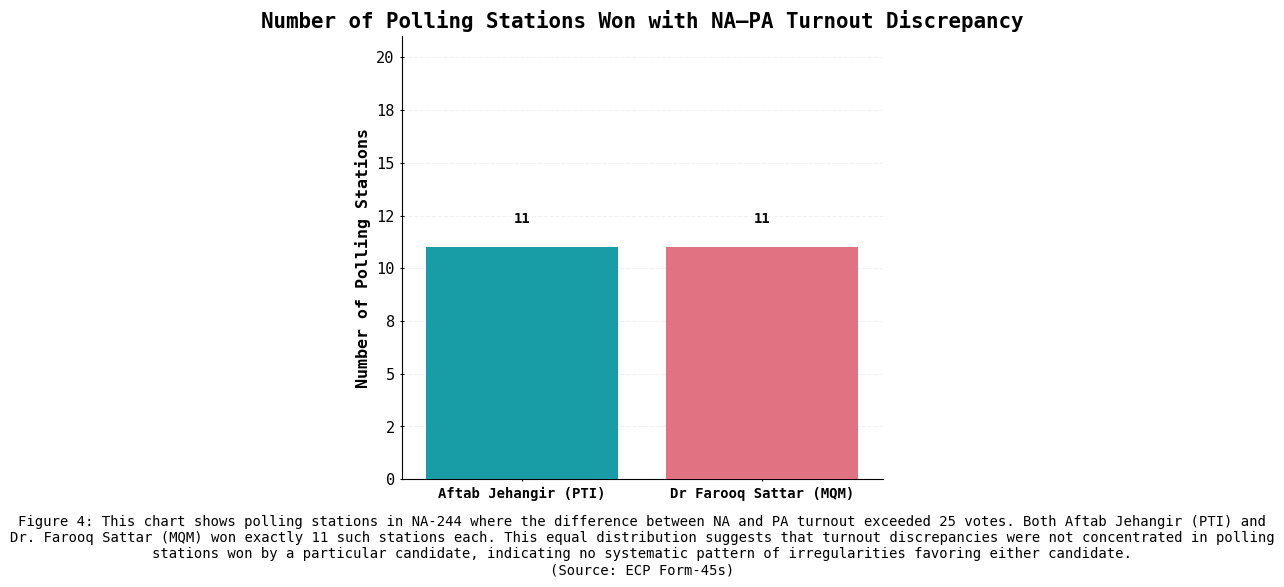

In [13]:
data_244_Discrepency = data_244[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy().dropna()
data_244_Discrepency = data_244_Discrepency[abs(data_244_Discrepency['TURNOUT_DIFFERENCE'].astype(int)) >= 25]

data_244_ECP_Winner_discrepency = data_244_Discrepency['WINNER_ECP'].value_counts().sort_index()
colors = [blue if i % 2 == 0 else pink for i in range(len(data_244_ECP_Winner_discrepency))]

plt.figure(figsize=(10, 6))
ax = plt.gca()

bars = sns.barplot(
    x=data_244_ECP_Winner_discrepency.index,
    y=data_244_ECP_Winner_discrepency.values,
    hue=data_244_ECP_Winner_discrepency.index,
    
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )
plt.title('Number of Polling Stations Won with NA–PA Turnout Discrepancy', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(data_244_ECP_Winner_discrepency.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 4: This chart shows polling stations in NA-244 where the difference between NA and PA turnout exceeded 25 votes. Both Aftab Jehangir (PTI) and\n'
    'Dr. Farooq Sattar (MQM) won exactly 11 such stations each. This equal distribution suggests that turnout discrepancies were not concentrated in polling\n'
    'stations won by a particular candidate, indicating no systematic pattern of irregularities favoring either candidate.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)
plt.tight_layout()
plt.savefig('./Graphs/Figure_4.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 5**
This shows the distribution of absolute turnout differences between NA and PA polling stations in General Elections 2024 in NA-242 (Based on ECP Form-45s)

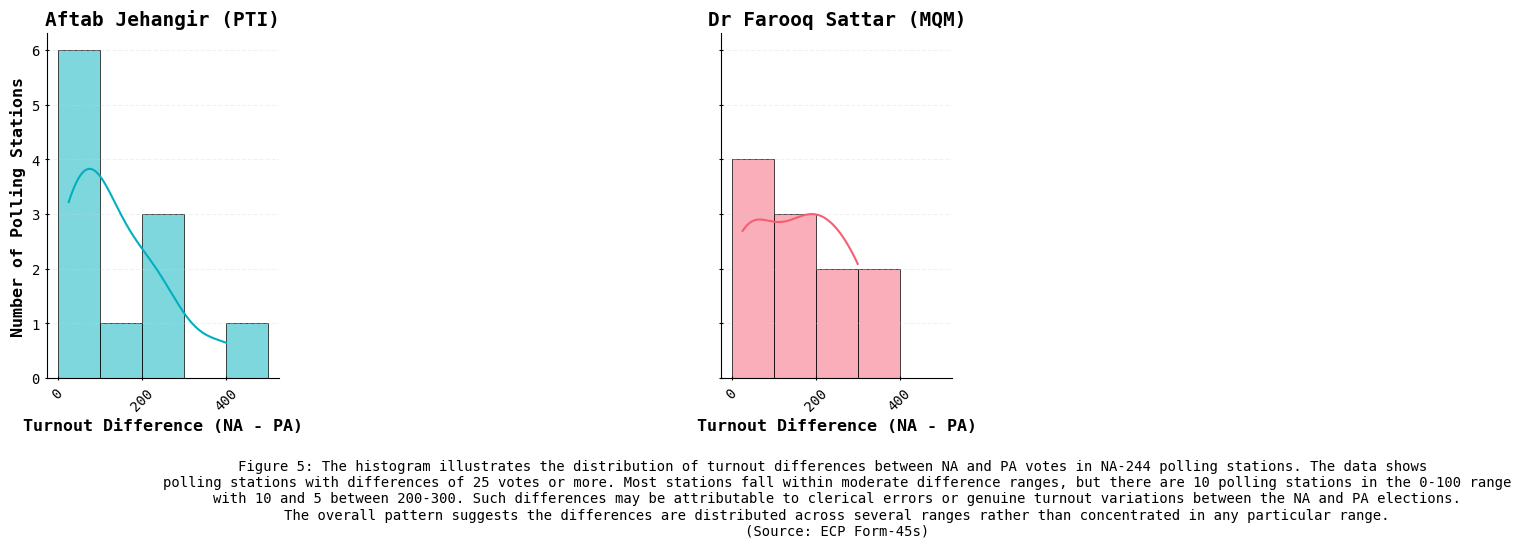

In [26]:
data_244_discrepency = data_244[['TURNOUT_DIFFERENCE', 'WINNER_ECP']].copy()
data_244_discrepency['TURNOUT_DIFFERENCE'] = pd.to_numeric(data_244_discrepency['TURNOUT_DIFFERENCE'], errors='coerce')
data_244_discrepency = data_244_discrepency.dropna()

data_244_discrepency = data_244_discrepency[abs(data_244_discrepency['TURNOUT_DIFFERENCE']) >= 25]

min_diff = (data_244_discrepency['TURNOUT_DIFFERENCE'].min() // 100) * 100
max_diff = (data_244_discrepency['TURNOUT_DIFFERENCE'].max() // 100 + 1) * 100
bin_edges = np.arange(min_diff, max_diff + 100, 100)

candidates = data_244_discrepency['WINNER_ECP'].unique()
candidate_data = {candidate: data_244_discrepency[data_244_discrepency['WINNER_ECP'] == candidate] for candidate in candidates}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

colors = [blue, pink] 
for i, (candidate, subset) in enumerate(sorted(candidate_data.items())):
    sns.histplot(
        data=subset,
        x='TURNOUT_DIFFERENCE',
        bins=bin_edges,
        kde=True,
        color=colors[i % len(colors)],
        edgecolor='black',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'{candidate}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Turnout Difference (NA - PA)', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

axes[0].set_ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')


# Annotation
plt.text(
    0.5, -0.35,
    'Figure 5: The histogram illustrates the distribution of turnout differences between NA and PA votes in NA-244 polling stations. The data shows \n'
    'polling stations with differences of 25 votes or more. Most stations fall within moderate difference ranges, but there are 10 polling stations in the 0-100 range\n'
    'with 10 and 5 between 200-300. Such differences may be attributable to clerical errors or genuine turnout variations between the NA and PA elections.\n'
    'The overall pattern suggests the differences are distributed across several ranges rather than concentrated in any particular range.\n(Source: ECP Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_5.png', dpi=600, bbox_inches='tight')
plt.show()

# **PTI Form 45s**

## **Graph 6**
This graph shows the number of polling stations won by the candidates in General Elections 2024 in NA-244 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3086/1878529901.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


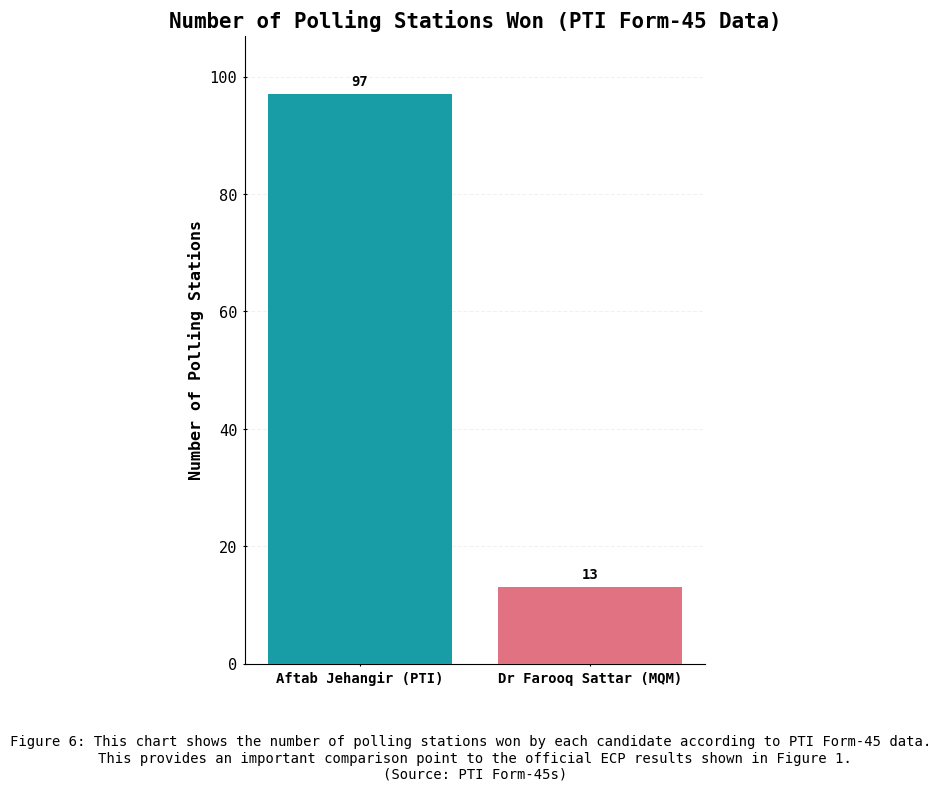

In [ ]:
data_244_pti = data_244[['OPP_VOTES_PTI', 'PTI_VOTES_PTI']].copy()
data_244_pti['OPP_VOTES_PTI_NUM'] = pd.to_numeric(data_244_pti['OPP_VOTES_PTI'], errors='coerce')
data_244_pti['PTI_VOTES_PTI_NUM'] = pd.to_numeric(data_244_pti['PTI_VOTES_PTI'], errors='coerce')
data_244_pti = data_244_pti.dropna(subset=['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM'])
data_244_pti['PTI_WINNER'] = np.where(
    data_244_pti['PTI_VOTES_PTI_NUM'] > data_244_pti['OPP_VOTES_PTI_NUM'],
    'Aftab Jehangir (PTI)',
    'Dr Farooq Sattar (MQM)'  
)

pti_winner_counts = data_244_pti['PTI_WINNER'].value_counts()
plt.figure(figsize=(8, 8))
ax = plt.gca()

colors = [blue if x == 'Aftab Jehangir (PTI)' else pink for x in pti_winner_counts.index]

bars = sns.barplot(
    x=pti_winner_counts.index,
    y=pti_winner_counts.values,
    palette=colors,
    zorder=5
)

for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10,
        fontweight='semibold'
    )

plt.title('Number of Polling Stations Won (PTI Form-45 Data)', fontsize=15, fontweight='bold', color='black')
plt.xlabel('', fontsize=14, fontweight='bold')
plt.ylabel('Number of Polling Stations', fontsize=12, fontweight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, max(pti_winner_counts.values) + 10)
plt.xticks(rotation=0, fontsize=10, fontweight='semibold')
plt.yticks(fontsize=11)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.text(
    0.5, -0.15,
    'Figure 6: This chart shows the number of polling stations won by each candidate according to PTI Form-45 data. \n'
    'This provides an important comparison point to the official ECP results shown in Figure 1.\n(Source: PTI Form-45s)',
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes,
    wrap=False
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_6.png', dpi=600, bbox_inches='tight')
plt.show()

## **Graph 7**
This shows the number of votes received by each candidate in General Elections 2024 in NA-244 (Based on PTI Form-45s)

/var/folders/7n/ssq8qhqs3ng39t12_9znjspw0000gn/T/ipykernel_3086/4114413339.py:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


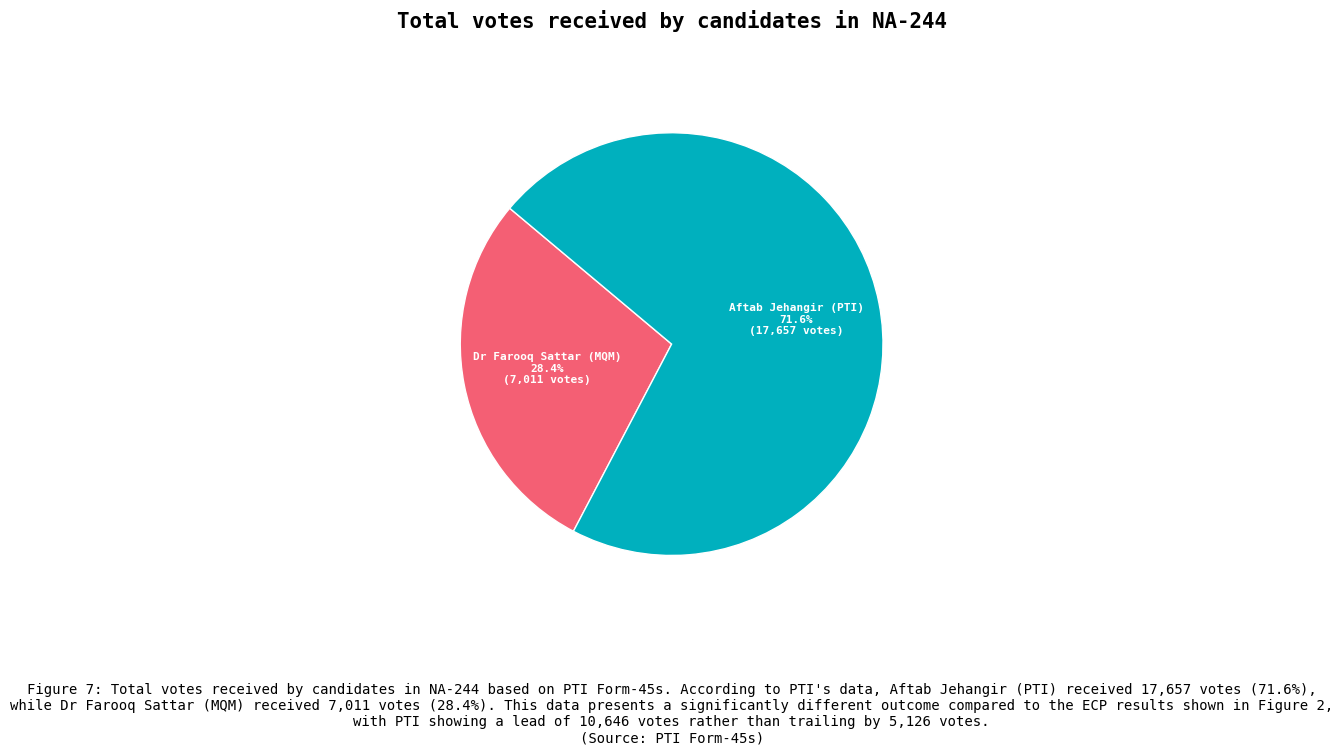

In [ ]:
data_244_votes_pti = data_244_pti[['OPP_VOTES_PTI_NUM', 'PTI_VOTES_PTI_NUM']].sum()
data_244_votes_pti.index = ['Dr Farooq Sattar (MQM)', 'Aftab Jehangir (PTI)']
candidate_colors = {
    'Dr Farooq Sattar (MQM)': pink,
    'Aftab Jehangir (PTI)': blue
}
colors = [candidate_colors[name] for name in data_244_votes_pti.index]
labels = data_244_votes_pti.index
values = data_244_votes_pti.values
def make_autopct(labels, values):
    def my_autopct(pct):
        val = int(round(pct * sum(values) / 100.0))
        label = labels[my_autopct.i]
        my_autopct.i += 1
        return f'{label}\n{pct:.1f}%\n({val:,} votes)'
    my_autopct.i = 0
    return my_autopct
plt.figure(figsize=(6, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=None,
    autopct=make_autopct(labels, values),
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 8, 'weight': 'bold', 'color': 'white'}
)
plt.title('Total votes received by candidates in NA-244', fontsize=15, fontweight='bold', color='black')
plt.axis('equal') 
plt.text(
    0.5, -0.1,
    'Figure 7: Total votes received by candidates in NA-244 based on PTI Form-45s. According to PTI\'s data, Aftab Jehangir (PTI) received 17,657 votes (71.6%),\n'
    'while Dr Farooq Sattar (MQM) received 7,011 votes (28.4%). This data presents a significantly different outcome compared to the ECP results shown in Figure 2,\n'
    'with PTI showing a lead of 10,646 votes rather than trailing by 5,126 votes.\n(Source: PTI Form-45s)',
    wrap=False,
    fontsize=10,
    ha='center',
    va='center',
    transform=plt.gca().transAxes
)

plt.tight_layout()
plt.savefig('./Graphs/Figure_7.png', dpi=600, bbox_inches='tight')
plt.show()